## 巡回セールスマン問題

In [57]:
import networkx as nx
import matplotlib.pyplot as plt
import blueqat.opt as wq
import numpy as np

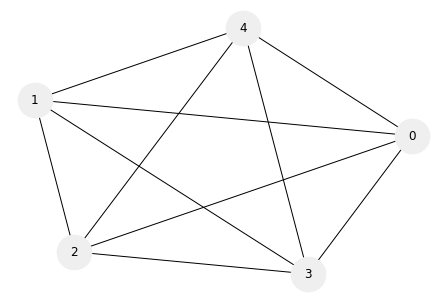

In [58]:
#グラフ描写
options = {'node_color': '#efefef','node_size': 1200,'with_labels':'True'}
G = nx.Graph()
G.add_nodes_from(nx.path_graph(5))
G.add_edges_from([(0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)])
nx.draw(G, **options)

In [59]:
#入力セル
print("Number of cities:")
pu_cities_size = int(input())
print("The cost of constraint:")
pu_B = float(input())
# cost_matrix = np.array([[0,1,1],[0,2,2],[0,3,3],[0,4,4],[1,0,1],[1,2,3],[1,3,4],[1,4,5],[2,0,2],[2,1,3],[2,3,5],[2,4,6],[3,0,3],[3,1,4],[3,2,5],[3,4,7],[4,0,4],[4,1,5],[4,2,6],[4,3,7]])
cost_matrix = np.array([[0,1,1],[0,2,5],[0,3,4],[1,0,1],[1,2,2],[1,3,6],[2,0,5],[2,1,2],[2,3,3],[3,0,4],[3,1,6],[3,2,3]])

Number of cities:
4
The cost of constraint:
0.25


In [60]:
#コスト関数：第１項
def get_traveling_qubo(cities_size):
    qubo_size = cities_size*cities_size
    traveling_qubo = np.zeros((qubo_size, qubo_size))
    indices = [(u, v, i, j) for u in range(cities_size) for v in range(cities_size) for i in range(cities_size) for j in range(cities_size)]
    for u, v, i, j in indices:
        ui = u * cities_size + i
        vj = v * cities_size + j
        if ui > vj:
            continue
        if ui == vj:
            traveling_qubo[ui][vj] -= 2
        if u == v and i != j:
            traveling_qubo[ui][vj] += 2
        if u < v and i == j:
            traveling_qubo[ui][vj] += 2
    return traveling_qubo, qubo_size, cities_size
traveling_qubo, qubo_size, cities_size = get_traveling_qubo(pu_cities_size)

In [61]:
#コスト関数：第２項
def get_traveling_cost_qubo(qubo_size, cities_size, cost_matrix):
    traveling_cost_qubo = np.zeros((qubo_size, qubo_size))
    indices = [(u, v, i, j) for u in range(cities_size) for v in range(cities_size) for i in range(cities_size) for j in range(cities_size)]
    for u, v, i, j in indices:
        ui = u * cities_size + i
        vj = v * cities_size + j
        k = abs(i - j)
        if ui > vj:
            continue
        if (k ==1 or k == cities_size-1) and u < v:
            for r in range(len(cost_matrix)):
                if cost_matrix[r][0] == u and cost_matrix[r][1] == v:
                    traveling_cost_qubo[ui][vj] += cost_matrix[r][2]
    return traveling_cost_qubo
traveling_cost_qubo = get_traveling_cost_qubo(qubo_size, cities_size, cost_matrix)

In [62]:
#観測
def get_travelingsalesman_qubo(traveling_cost_qubo, traveling_qubo, B):
    a = wq.opt()
    a.qubo = traveling_qubo + traveling_cost_qubo * B
    answer = a.sa()
    print(answer)
    a.plot()
    return answer

In [63]:
#ハミルトニアンの検証
def calculate_H_f(q, cities_size):
    H_f = 0
    for v in range(cities_size):
        sum_x = 0
        for i in range(cities_size):
            index = v * cities_size + i
            sum_x += q[index]
        H_f += (1 - sum_x) ** 2
    print(H_f)
    return H_f

def calculate_H_s(q, cities_size):
    H_s = 0
    for i in range(cities_size):
        sum_x = 0
        for v in range(cities_size):
            index = v * cities_size + i
            sum_x += q[index]
        H_s += (1 - sum_x) ** 2
    print(H_s)
    return H_s

def calculate_H_t(q, cities_size, cost_matrix):
    H_t = 0
    indices = [(u, v, i, j) for u in range(cities_size) for v in range(cities_size) for i in range(cities_size) for j in range(cities_size)]
    for u, v, i, j in indices:
        ui = u * cities_size + i
        vj = v * cities_size + j
        k = abs(i - j)
        if ui >= vj:
            continue
        if k == 1:
            if q[ui] == 1 and q[vj] == 1:
                for k in range(len(cost_matrix)):
                    if cost_matrix[k][0] == u and cost_matrix[k][1] == v:
                        H_t += cost_matrix[k][2]
    print(H_t)
    return H_t

def calculate_H(q, cities_size, cost_matrix, B):
    print("hamiltonian_f =")
    H_f = calculate_H_f(q, cities_size)
    print("hamiltonian_s =")
    H_s = calculate_H_s(q, cities_size)
    print("hamiltonian_t =")
    H_t = calculate_H_t(q, cities_size, cost_matrix)
    H =  H_f + H_s + H_t * B
    print("hamiltonian =")
    print(H)
    return H
# calculate_H(q, cities_size, cost_matrix, pu_B)

[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]


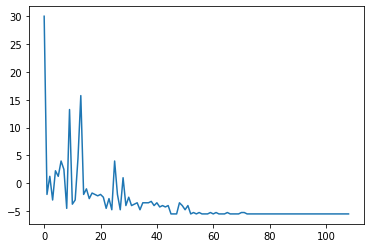

hamiltonian_f =
0
hamiltonian_s =
0
hamiltonian_t =
9
hamiltonian =
2.25
[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]


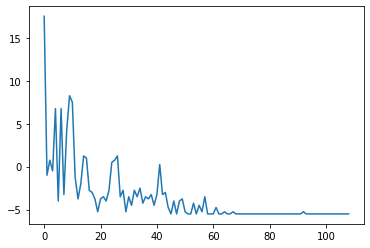

hamiltonian_f =
0
hamiltonian_s =
0
hamiltonian_t =
6
hamiltonian =
1.5
[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]


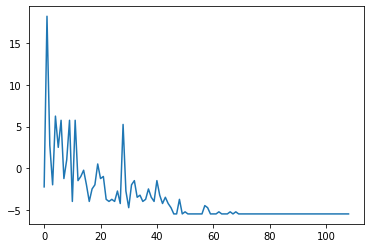

hamiltonian_f =
0
hamiltonian_s =
0
hamiltonian_t =
8
hamiltonian =
2.0
[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]


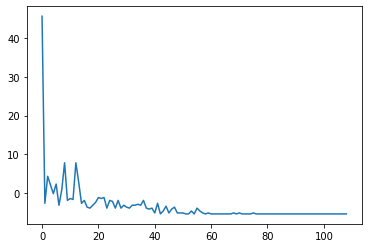

hamiltonian_f =
0
hamiltonian_s =
0
hamiltonian_t =
9
hamiltonian =
2.25
[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]


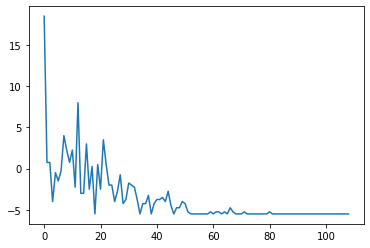

hamiltonian_f =
0
hamiltonian_s =
0
hamiltonian_t =
9
hamiltonian =
2.25
[0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0]


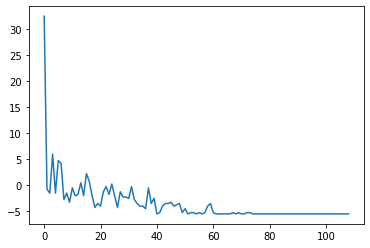

hamiltonian_f =
0
hamiltonian_s =
0
hamiltonian_t =
6
hamiltonian =
1.5
[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]


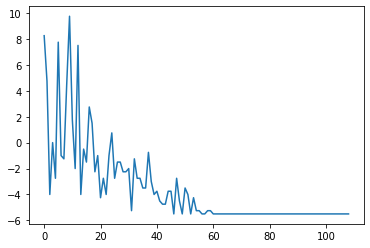

hamiltonian_f =
0
hamiltonian_s =
0
hamiltonian_t =
8
hamiltonian =
2.0
[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0]


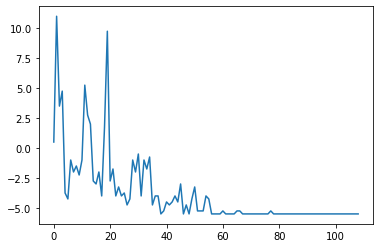

hamiltonian_f =
0
hamiltonian_s =
0
hamiltonian_t =
7
hamiltonian =
1.75
[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]


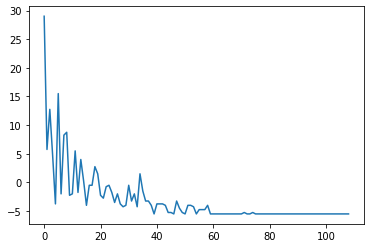

hamiltonian_f =
0
hamiltonian_s =
0
hamiltonian_t =
9
hamiltonian =
2.25
[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]


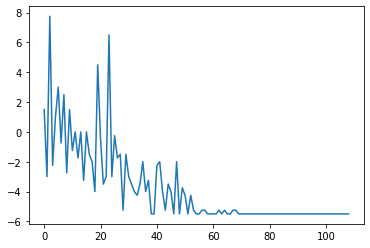

hamiltonian_f =
0
hamiltonian_s =
0
hamiltonian_t =
9
hamiltonian =
2.25


In [64]:
#出力セル
traveling_qubo, qubo_size, cities_size = get_traveling_qubo(pu_cities_size)
traveling_cost_qubo = get_traveling_cost_qubo(qubo_size, cities_size, cost_matrix)
for i in range(10):
    q = get_travelingsalesman_qubo(traveling_cost_qubo, traveling_qubo, pu_B)
#     print(q)
    calculate_H(q, cities_size, cost_matrix, pu_B)
# traveling_qubo, qubo_size, cities_size = get_traveling_qubo(pu_cities_size)
# traveling_cost_qubo = get_traveling_cost_qubo(qubo_size, cities_size, cost_matrix)
# q = get_travelingsalesman_qubo(traveling_cost_qubo, traveling_qubo, pu_B)
# # print(q)